###### PREGUNTA 1 ######
resolvemos las ecuaciones por el método SOR
Para w= 1.59
Los valores obtenidos, con un error aparente:   8.881688988515551e-06 < 1e-05 (epsilon dado),  fueron:

[13.333331951571541, 53.33332076382287, 79.99997718964579, 88.8888636345209]

Este resultado fue alcanzado con  49  iteraciones

Resultante de la ecuación Ek =  1.0613893642164472e+37 *k^{ -27.89692965520059 }


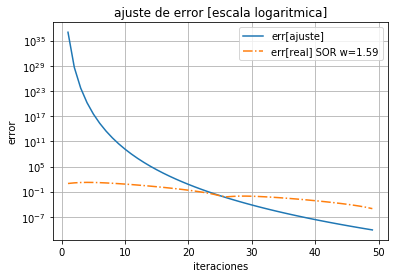

###### PREGUNTA 2 ######


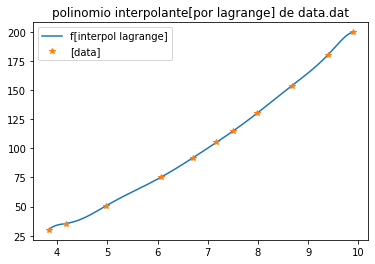

###### PREGUNTA 3 ######



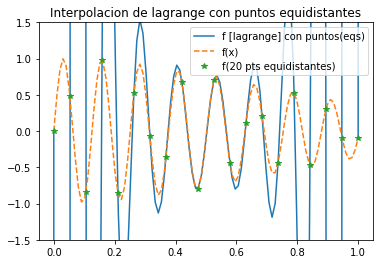

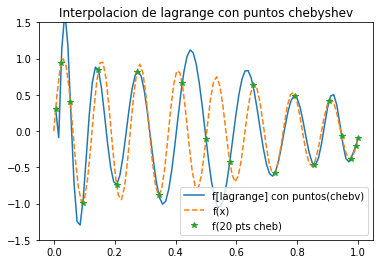

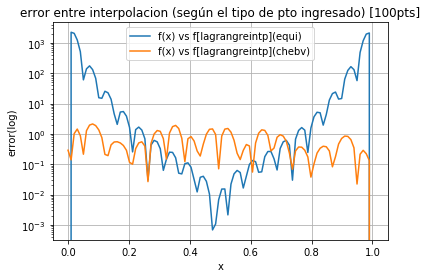

In [5]:
#! /usr/bin/python3

from numpy import *

import matplotlib.pyplot as plt # from pylab import plot,show
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")


####################
'''
    PREGUNTA 1
'''
####################

###Las ecuaciones del sistema serán:
''' 1°   F=k4(x4-x3)  ;2°  k4(x4-x3)=k3(x3-x2)  ; 3° k3(x3-x2)=k2(x2-x1)  ; 4°  k2(x2-x1)=k1x1  '''

####Datos
# K=array([150,50,75,225],float64) #N/m,  K = [k1,k2,k3,k4]
# F=2000 #N

###Reemplazando los valores y reordenando las ecuaciones obtenemos:
'''
   4°:  -(k2+k1)x1 + k2x2 = 0       ------------> -(200)x1  +  (50)x2  +   (0)x3  +   (0)x4  = 0
   3°:  k2x1 -(k2+k3)x2 + k3x3 = 0  ------------>   (50)x1  - (125)x2  +  (75)x3  +   (0)x4  = 0
   2°:  k3x2 - (k4+k3)x3 + k4x4 = 0 ------------>    (0)x1  +  (75)x2  - (300)x3  + (225)x4  = 0
   1°:  -k4x3 + k4x4 = F            ------------>    (0)x1  +   (0)x2  - (225)x3  + (225)x4  = 2000

'''

M=array([(-200,50,0,0),
         (50,-125,75,0),
         (0,75,-300,225),
         (0,0,-225,225)],float)

N=array([0,0,0,2000],float)

def imprimir_problema(M,N):
    lineas = len(M)
    #creando matriz de variables
    X=[]
    linea_igual = lineas % 2
    if linea_igual != 0 :
        linea_igual = 0.5 + lineas/2
    for k in range(lineas):
        p= "x"+str(k)
        X.append(p)
    for i in range (lineas):
        if i == (linea_igual-1):
            print(M[i]," ","[",X[i],"]","=","[",N[i],"]")
        else : 
            print(M[i]," ","[",X[i],"]"," ","[",N[i],"]") 
    return " "

#Sea la matriz del problema

def normav(xup,xlow):                  #funcion para el error 
    r = xup - xlow
    lim= len(r)
    temp=0
    for i in range (lim):
        temp += r[i]**2
    return temp**0.5

def diagonal(M):   #genera la matriz diagonal de M
    limite = len(M)
    dim_M = M.shape 
    D = zeros(dim_M)#la hacemos un solo vector con los valores de diagonal    
    for i in range(limite):
        D[i][i] = M[i][i] 
    return D

def upper(M):   #genera la matriz triangular superior a partir de M
    limite = len(M)
    dim_M = M.shape
    U = zeros(dim_M)
    for i in range(limite):
        for j in range (i+1,limite):
            U[i][j] = M[i][j]
    return U

def lower(M): 
    limite = len(M)
    dim_M = M.shape 
    L = zeros(dim_M) #con tamaño dim_M=(rangoM,rangoM) por ser M cuadrada
    for i in range(limite):
        for j in range (i+1,limite):
            L[j][i] = M[j][i]
    return L

def met_SOR(M,N,omega):
    
    limite = len(M)
    #dividimos la matriz principal en matrices D, L y U
    
    D=diagonal(M)
    L=lower(M)
    U=upper(M)
    
    #lista de errores
    err_SOR=[]
        
    #Se define Lx para luego ser facilmente utilizado en la eq principal
    Lx = D + omega*L
    Lx = linalg.inv(Lx)
    
    X=[] #array para almacenar los valores de (x, y, z)
        
    #la 1era iteracion es especial pues debemos comenzar con un "guess value"
    #generalizamos para n pero en este ejercicio haremos (x0,y0,z0) = (0,0,0)
    
    for j in range(limite):
        x = 0
        X.append(x)
    i=len(X) 
        
    #por lo anterior, esta parte siempre emperazará desde la 2da iteración
    epsilon =  0.00001
    err_it = 1
    iteracion = 1
    
    while err_it > epsilon :
        for k in range (limite):
            y= dot(Lx, N - dot((1-omega)*L+U, X[0:i]))
            
        #buscamos el error, analizamos solo para el valor de x
        err_it= normav(y,X)
        err_SOR.append(err_it)
        
        X=[] #vaciamos X y luego le agregamos los nuevos valores de y para la nueva iteracion
        #ingresamos los valores de y a la lista X
        for j in range (limite):
            X.append(y[j])
        #print(y,X,iteracion,err_it) #decomentar para ver la evolucion según se varía epsilon          
        y=[] #vaciamos y    
        iteracion += 1  
        
    return (err_it,err_SOR,X,iteracion,epsilon)

def graf_SOR(err_it,err_SOR,epsilon,X,iteracion,omega):
    print("Para w=",omega)
    print("Los valores obtenidos, con un error aparente:  ",err_it,"<",epsilon,"(epsilon dado),  fueron:")
    print("")
    print(X)
    print("")
    print("Este resultado fue alcanzado con ",iteracion-1," iteraciones")
#     plt.plot(err_SOR, label = "SOR w="+str(omega))
    return("")

''' ITEM 1 PREGUNTA 1'''

print("###### PREGUNTA 1 ######")
print("resolvemos las ecuaciones por el método SOR")

w=1.59 #iteraciones para [w=1.57 : 52 its]  [w=1.6 : 55 its ]
err_ultit,error_SOR,X,iteraciones,eps = met_SOR(M,N,w)

print(graf_SOR(err_ultit,error_SOR,eps,X,iteraciones,w)) #imprime el comentario 

###Para ajustar la curva, linearizaremos la eq dada para el error obteniendo
'''              log(Err) = log(beta) + alfa*log(k)                (eq  1.1)'''
#Luego, para hallar las ctes, hallamos los valores de los logs para esta ecuación

#de lo hallado :
#     k = iteraciones-1               (nro de iteraciones)
#     Err = error_SOR                 (lista de errores en cada iteracion)


kas = array(range(1,iteraciones)) #output klog=[1 2 .. 49]
klog = log10(kas)

errlog = log10(error_SOR)


def lr_mincuad(x,y):
    
    n = len(x)   
    
    Zx = 0 #para almacenar la suma de todos los x
    for i in range(n):
        Zx+= x[i]
    x_media = Zx/n
    Zy = 0 #para almacenar la suma de todos los y
    for i in range(n):
        Zy+= x[i]
    y_media = Zy/n
    
    Zcuadx=0 #para sumatoria de x**2's
    for i in range(n):
        Zcuadx += x[i]**2
    
    Zprod=0 #para para sumatoria de xy's
    for i in range(n):
        Zprod += x[i]*y[i]
    
    #hallando a0 y a1
    a1 = (n*Zprod - Zx*Zy)/(n*Zcuadx - Zx**2)
    
    a0 = y_media - (a1*x_media)
    
    return(a0,a1)



#se obtienen los coeficientes de la ecuacion 1.1 
a0,a1 = lr_mincuad(klog,errlog)
#por lo que la ecuacion será :
'''              log(Err) = a0 + a1*log(k)                (eq  1.2)'''
#volviendo a la ecuacion inicial, tendremos:
'''              Err = (10**a0)*(k**a1)                (eq  1.2)'''

F = (10**a0)*(kas**a1)  #funcion analizada en los coefs de la linealizacion
plt.plot(array(range(1,iteraciones)),F,label="err[ajuste]")
print("Resultante de la ecuación Ek = ",10**a0,"*k^{",a1,"}")
plt.plot(array(range(1,iteraciones)),error_SOR,'-.',label="err[real] SOR w="+str(w))

plt.yscale('log')
plt.legend()
plt.title("ajuste de error [escala logaritmica]")
plt.grid()
plt.ylabel('error')
plt.xlabel('iteraciones')
plt.show()




print("###### PREGUNTA 2 ######")

####################
'''
    PREGUNTA 2
'''
####################

datos =loadtxt('datos.dat')

#reordenamos los datos
nd=len(datos)
x2=[]
y2=[]
for i in range(nd):
    x2.append(datos[i][0])
    y2.append(datos[i][1])

#interpolando los datos con Lagrange
''' ITEM 1 PREGUNTA 2'''
xs,ys = f_lag(x2,y2) 
plt.plot(xs,ys,label="f[interpol lagrange]")
plt.plot(x2,y2,'*',label="[data]")#funcion que intentamos hallar
plt.title("polinomio interpolante[por lagrange] de data.dat")
plt.legend()
plt.show()








print("###### PREGUNTA 3 ######")

####################
'''
    PREGUNTA 3
'''
####################

#funcion que halla L[k] para la iteracion k de Lagrange
def valor_lk(t,x,k): #t: valor, x:puntos dados, k: subindice de L(recordar iniciarlo en 0)
    n = len(x)
    Lk=1
    xk=x[k]
    for i in range(n):
        if i==k:
            Lk=Lk*1                    #cuando x[i]=x[k]
        else:
            Lk=Lk*(t-x[i])/(xk-x[i])   #recurrencia
    return(Lk)


def f_lag(x,y): #interpolacion de lagrange para pts equidistantes
      
    lim = len(x)
    a_rango= min(x)
    b_rango= max(x)
    npts=100 
    ts = linspace(a_rango,b_rango,npts)#generando el espacio en x para los valores aka rango
   
    Lkt_vals = []  #Lista de Lk evaluados en t
    funcionLg = [] #valores evaluados en t en la funcion
    for i in range (npts):
        Lk_vals=[]     #lista para almacenar los valores temporales de Lk en t 
        t = ts [i]
        for k in range (lim):
            Lk = valor_lk(t,x,k)
            Lk_vals.append(Lk)
        f=0
        for j in range (lim):
            f+= y[j]*Lk_vals[j]
        funcionLg.append(f)
       
    return(ts,funcionLg)

def graf_eqlag(ts,funcionLg):
    npts = len(ts)
    plt.plot(ts,funcionLg, label = "f [lagrange] con puntos(eqs)")
    plt.title("Interpolacion de lagrange con puntos equidistantes")
    return("")
    

def pts_chebv(a,b,espaciox): #genera los puntos de chebyshev y los analiza en la funcion
    n=espaciox
    X=[]
    for j in range(n):
        x = a + 0.5*(b-a)*(1+cos(j*pi/n))
        X.append(x)
    X.reverse() #pues se generan de forma decreciente y lo necesitamos de forma ascendente
    
    #aqui agregar la funcion del ejercicio
    funcionxvr = []
    for i in range (n):
        f = (exp(-(X[i]**2))*sin(50*X[i]))
        #aqui termina la funcion del ejercicio 
        funcionxvr.append(f)
#     print(X)  
    return(X,funcionxvr)


    
def graf_cheblag(ts,funcionLg):
    plt.plot(ts,funcionLg, label = "f[lagrange] con puntos(chebv)")
    plt.title("Interpolacion de lagrange con puntos chebyshev")
    return("")


''' funcion del problema:'''
x=linspace(0,1,100)
y=(exp(-(x**2))*sin(50*x))   #funcion que intentamos hallar

''' ITEM 1 PREGUNTA 3'''
###Generamos 20 puntos equidistantes
x3=linspace(0,1,20)
y3=(exp(-(x3**2))*sin(50*x3))

ts_eq,funcionLg_eq = f_lag(x3,y3) 
print(graf_eqlag(ts_eq,funcionLg_eq))
plt.plot(x,y,'--',label="f(x)")#funcion que intentamos hallar
plt.plot(x3,y3,'*',label="f(20 pts equidistantes)")
plt.legend()
plt.ylim(top=1.5,bottom=-1.5)
plt.show()



''' ITEM 2 PREGUNTA 3'''
###Generamos 20 puntos de chebyshev
tx,f=pts_chebv(0,1,20)  #la funcion del ejercicio fue añadida dentro de la rutina pts_chebv #camb 50 a 20
ts_ch,funcionLg_ch = f_lag(tx,f) #cheb:lag x eq_lag
print(graf_cheblag(ts_ch,funcionLg_ch))
plt.plot(x,y,'--',label="f(x)") #funcion que intentamos hallar
plt.plot(tx,f,'*',label="f(20 pts cheb)")
plt.ylim(top=1.5,bottom=-1.5)
plt.legend()
plt.show()



''' ITEM 3 PREGUNTA 3'''
#generamos la funcion con 100 puntos:
x33=linspace(0,1,100) 
y33=(exp(-(x33**2))*sin(50*x33))

#### ERROR ####
def err_pol(datos1,datos2,name):
    x=datos1
    n = len(datos1)
    y=datos2   
    err=[]
    itter = linspace(0,1,n)
    for i in range(n):
        temp_err=abs(y[i]-x[i])
        err.append(temp_err)
    
    plt.title("error entre interpolacion (según el tipo de pto ingresado) [100pts]")
    plt.ylabel('error(log)')
    plt.xlabel('x')
    plt.plot(itter,err,label=str(name))
    return("")

xf=linspace(0,1,100) 
fff=(exp(-(xf**2))*sin(50*xf))

tx100,f100=pts_chebv(0,1,100) #analiza los pts de chebv en la funcion sin interpolar

#### GRAFICA DEL ERROR ####
print(err_pol(funcionLg_eq,fff,"f(x) vs f[lagrangreintp](equi)"))
print(err_pol(funcionLg_ch,f100,"f(x) vs f[lagrangreintp](chebv)"))
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()